In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 설정을 위한 코드 (이미 설정하셨다면 생략)
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

In [3]:
df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/4차_전처리.csv')
df

,아이디,국가별,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,"문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)",문9-3. 총 체재기간_61일 이상 결측,...,주요 체재 지역,총 국내 지출경비,총 식비_비율,총 국내 교통비_비율,총 체험/활동비_비율,총 뷰티/의료비_비율,총 여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율
0,6.0,3.0,2.0,2.0,4.0,2,1,6,1,6,...,서울,1093.20,0.324863,0.120051,0.021186,0.049433,0.000000,0.112999,0.353110,0.018359
1,12.0,5.0,2.0,4.0,1.0,7,4,5,3,2,...,서울,1140.09,0.168539,0.033708,0.011236,0.000000,0.000000,0.337079,0.449438,0.000000
2,14.0,8.0,2.0,3.0,1.0,4,10,1,3,3,...,서울,1430.10,0.158730,0.088889,0.022222,0.000000,0.000000,0.666667,0.063492,0.000000
3,19.0,8.0,1.0,5.0,1.0,1,4,4,3,4,...,서울,1759.25,0.129032,0.419355,0.000000,0.000000,0.000000,0.258065,0.193548,0.000000
4,20.0,3.0,1.0,2.0,1.0,6,6,6,2,4,...,서울,1336.60,0.243902,0.170732,0.000000,0.000000,0.146341,0.195122,0.243902,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,21569.0,1.0,1.0,2.0,1.0,5,3,6,1,2,...,제주,477.03,0.441167,0.073538,0.000000,0.029411,0.000000,0.147056,0.294111,0.014716
9648,21570.0,1.0,1.0,4.0,1.0,1,10,7,2,3,...,제주,925.98,0.454545,0.090909,0.000000,0.000000,0.000000,0.303030,0.151515,0.000000
9649,21571.0,1.0,1.0,3.0,1.0,5,3,1,6,2,...,제주,4812.29,0.072886,0.000000,0.000000,0.000000,0.005831,0.043732,0.874636,0.002915
9650,21573.0,1.0,2.0,4.0,2.0,5,1,1,1,2,...,제주,357.77,0.392151,0.000000,0.000000,0.000000,0.000000,0.196076,0.392151,0.019622


In [4]:
df.columns

Index(['아이디', '국가별', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1순위',
       '문3-1. 고려한 관광활동_1순위', '문3-2. 고려한 관광인프라_1순위',
       '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)',
       '문9-3. 총 체재기간_61일 이상 결측', '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역',
       '총 국내 지출경비', '총 식비_비율', '총 국내 교통비_비율', '총 체험/활동비_비율', '총 뷰티/의료비_비율',
       '총 여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율'],
      dtype='object')

# '주요 체재 지역'

In [7]:
df['주요 체재 지역'].unique()

array(['서울', '충북', '강원', '부산', '제주', '인천', '경기', '전남', '울산', '세종', '광주',
       '대전', '충남', '경북', '대구', '경남', '전북'], dtype=object)

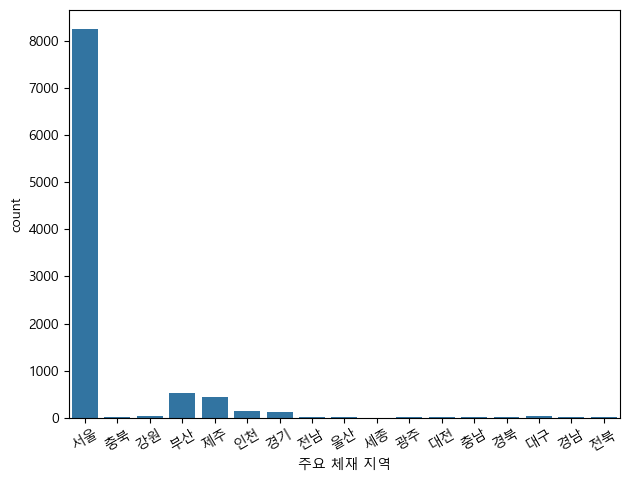

In [31]:
sns.countplot(data=df, x='주요 체재 지역')
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

In [26]:
import plotly.express as px

In [24]:
# 1. 비율 계산 (normalize=True 옵션 사용)
# 결과는 0.0 ~ 1.0 사이의 소수로 나옵니다.
region_ratios = df['주요 체재 지역'].value_counts(normalize=True)

# 2. 보기 좋게 백분율(%)로 변환하고 반올림
region_ratios_pct = (region_ratios * 100).round(2)

# 3. 건수(Count)와 비율(%)을 합쳐서 하나의 데이터프레임으로 보기 (추천)
region_summary = pd.DataFrame({
    '방문 건수': df['주요 체재 지역'].value_counts(),
    '비율 (%)': region_ratios_pct
})

print("--- 주요 체재 지역별 분포 ---")
print(region_summary)

--- 주요 체재 지역별 분포 ---
          방문 건수  비율 (%)
주요 체재 지역               
서울         8238   85.35
부산          533    5.52
제주          444    4.60
인천          143    1.48
경기          130    1.35
대구           35    0.36
강원           30    0.31
울산           15    0.16
경북           13    0.13
충남           12    0.12
전남           12    0.12
대전           11    0.11
광주           10    0.10
충북            8    0.08
경남            8    0.08
전북            8    0.08
세종            2    0.02


In [30]:
import pandas as pd
import plotly.express as px

# --- 1. 데이터 준비 (이전 코드와 동일하다고 가정) ---
# region_summary는 인덱스에 지역명, 컬럼에 '방문 건수', '비율 (%)'을 가진 DataFrame입니다.

# 에러를 해결하고 시각화를 위한 데이터프레임 생성
df_to_plot = region_summary.reset_index()

# **핵심 수정**: 새로 생성된 지역 컬럼의 이름을 '주요 체재 지역'으로 변경
df_to_plot.rename(columns={'index': '주요 체재 지역'}, inplace=True) 

# --- 2. 시각화 코드 ---
fig = px.bar(
    df_to_plot, # 수정된 데이터프레임 사용
    x='주요 체재 지역', # <--- 'index' 대신 '주요 체재 지역' 컬럼 이름 사용
    y='비율 (%)',
    text='비율 (%)', 
    title='주요 체재 지역별 분포 비율',
    labels={'주요 체재 지역': '지역', '비율 (%)': '비율 (%)'},
    color='비율 (%)', 
    color_continuous_scale='Blues'
)

fig.update_layout(
    xaxis_title='지역', 
    yaxis_title='비율 (%)',
    xaxis_tickangle=45 
)
fig.show()

In [35]:
pd.set_option('display.max_columns', None)
df[df['주요 체재 지역']=='세종']

,아이디,국가별,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,"문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)",문9-3. 총 체재기간_61일 이상 결측,숙박시설_그룹,여행동반자_그룹,방문 지역 수,주요 체재 지역,총 국내 지출경비,총 식비_비율,총 국내 교통비_비율,총 체험/활동비_비율,총 뷰티/의료비_비율,총 여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율
608,1779.0,97.0,2.0,3.0,1.0,7,4,6,2,6,1. 호텔+7. 친척 또는 친구 집,친구형,2,세종,2831.53,0.0,0.0,0.000000,0.0,0.943395,0.0,0.056605,0.00000
2828,7144.0,12.0,2.0,3.0,1.0,7,1,3,3,4,1. 호텔,직장형,4,세종,1805.00,0.0,0.0,0.022161,0.0,0.797784,0.0,0.166205,0.01385


In [42]:
df['주요 체재 지역'].value_counts()

주요 체재 지역
서울    8238
부산     533
제주     444
인천     143
경기     130
대구      35
강원      30
울산      15
경북      13
충남      12
전남      12
대전      11
광주      10
충북       8
경남       8
전북       8
세종       2
Name: count, dtype: int64

In [ ]:
fig, ax = plt.subplots(3,4, figsize=(12,16))
for re in df['주요 체재 지역'].value_counts().index[5:]:
    sns.

대구
강원
울산
경북
충남
전남
대전
광주
충북
경남
전북
세종


In [54]:
# X축: 범주형 변수, Y축: 비교하고 싶은 수치형 변수
fig = px.box(
    df, # 전체 데이터프레임
    x='주요 체재 지역', 
    y='문9-3. 총 체재기간_61일 이상 결측', 
    color='주요 체재 지역', # 박스 플롯마다 다른 색상 적용
    points='outliers', # 이상치도 표시
    title='주요 체재 지역별 총 체재기간 분포 비교'
)

fig.update_layout(
    xaxis_title='주요 체재 지역',
    yaxis_title='총 체재기간 (일)',
    showlegend=False # 범례 숨기기 (X축에 이미 라벨이 있음)
)

fig.show()

In [56]:
not_wanted = ['서울', '부산', '제주', '인천', '경기']

filtered = df[~df['주요 체재 지역'].isin(not_wanted)]

In [57]:
import pandas as pd
import plotly.express as px

# 1. 교차표 생성 (12개 지역 X 국가별)
# '주요 체재 지역'과 '국가별'의 관계를 보여주는 빈도표를 만듭니다.
# .T는 행/열 전환, normalize='index'는 각 지역 내 국가별 비율을 계산
cross_tab = pd.crosstab(
    filtered['주요 체재 지역'], 
    filtered['국가별'], 
    normalize='index' # 각 지역 내의 비율이 100%가 되도록 정규화
)

# 2. Plotly를 위한 데이터 변환 (Wide to Long)
# Plotly는 long-form 데이터를 선호합니다.
df_long = cross_tab.reset_index().melt(
    id_vars='주요 체재 지역', 
    var_name='국가별', 
    value_name='비율'
)

# 3. 100% 누적 막대 그래프 시각화
fig = px.bar(
    df_long,
    x='주요 체재 지역',
    y='비율',
    color='국가별', # 국가별 비율을 색상으로 구분
    title='주요 체재 지역별 국가 구성 비율 (100% 누적 막대)',
    labels={'비율': '비율 (%)'},
    hover_data={'비율': ':.1%'} # 호버 시 백분율로 표시
)

fig.update_layout(
    yaxis_tickformat='.0%', # Y축을 %로 표시
    xaxis_tickangle=45
)
fig.show()

대구: '대만'이 48% => 대구 - 대만 행 직항이 있음



In [59]:
# X축: 범주형 변수, Y축: 비교하고 싶은 수치형 변수
fig = px.box(
    filtered, # 전체 데이터프레임
    x='주요 체재 지역', 
    y='총 국내 지출경비', 
    color='주요 체재 지역', # 박스 플롯마다 다른 색상 적용
    points='outliers', # 이상치도 표시
    title='주요 체재 지역별 총 지출경비 비교'
)

fig.update_layout(
    xaxis_title='주요 체재 지역',
    yaxis_title='총 국내 지출경비',
    showlegend=False # 범례 숨기기 (X축에 이미 라벨이 있음)
)

fig.show()

In [62]:
# 1. 교차표 생성 (12개 지역 X 국가별)
# '주요 체재 지역'과 '국가별'의 관계를 보여주는 빈도표를 만듭니다.
# .T는 행/열 전환, normalize='index'는 각 지역 내 국가별 비율을 계산
cross_tab = pd.crosstab(
    df['주요 체재 지역'], 
    df['여행동반자_그룹'], 
    normalize='index' # 각 지역 내의 비율이 100%가 되도록 정규화
)

# 2. Plotly를 위한 데이터 변환 (Wide to Long)
# Plotly는 long-form 데이터를 선호합니다.
df_long = cross_tab.reset_index().melt(
    id_vars='주요 체재 지역', 
    var_name='여행동반자_그룹', 
    value_name='비율'
)

# 3. 100% 누적 막대 그래프 시각화
fig = px.bar(
    df_long,
    x='주요 체재 지역',
    y='비율',
    color='여행동반자_그룹', # 국가별 비율을 색상으로 구분
    title='주요 체재 지역별 여행동반자 비율 (100% 누적 막대)',
    labels={'비율': '비율 (%)'},
    hover_data={'비율': ':.1%'} # 호버 시 백분율로 표시
)

fig.update_layout(
    yaxis_tickformat='.0%', # Y축을 %로 표시
    xaxis_tickangle=45
)
fig.show()

## '참여한 활동' 비교

In [105]:
raw = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/만족도조사.csv')

C:\Users\sopi0\AppData\Local\Temp\ipykernel_29400\1595711854.py:1: DtypeWarning:

Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.



In [106]:
cols = [
'아이디',
'문7-1. 동반자 수(본인포함)',
'문7-1. 동반자 수(본인제외)',
'문8. 참여한 활동(1. 식도락 관광)',
'문8. 참여한 활동(2. 쇼핑)',
'문8. 참여한 활동(3. 자연경관 감상)',
'문8. 참여한 활동(4. 고궁/역사 유적지 방문)',
'문8. 참여한 활동(5. 전통문화체험)',
'문8. 참여한 활동(6. 박물관, 전시관 관람)',
'문8. 참여한 활동(7. K-POP, 한류스타 관련 공연장 및 드라마/영화 촬영지 방문)',
'문8. 참여한 활동(8. 연극, 뮤지컬, 발레 등 공연 관람)',
'문8. 참여한 활동(9. 지역 축제 참여)',
'문8. 참여한 활동(10. 유흥)',
'문8. 참여한 활동(11. 오락)',
'문8. 참여한 활동(12. 뷰티/미용 관광)',
'문8. 참여한 활동(13. 치료/건강검진)',
'문8. 참여한 활동(14. 스포츠/레포츠 관람)',
'문8. 참여한 활동(15. 스포츠/레포츠 참가)',
'문8. 참여한 활동(16. 국제회의)',
'문8. 참여한 활동(17. 비즈니스 전문활동)',
'문8. 참여한 활동(18. 연수, 교육, 연구)',
'문8. 참여한 활동(19. 기타)',
'문9-1. 가장 좋았던곳_1',
'문9-1. 가장 좋았던곳_2',
'문9-1. 가장 좋았던곳_3',
'문9-1. 가장 좋았던곳_4',
'문9-1. 가장 좋았던곳_5',
'문8-1. 만족한 활동_1순위',
'문8-1. 만족한 활동_2순위',
'문8-1. 만족한 활동_3순위',
'문10-2. 쇼핑 항목(1. 향수, 화장품)',
'문10-2. 쇼핑 항목(2. 식료품)',
'문10-2. 쇼핑 항목(3. 의류)',
'문10-2. 쇼핑 항목(4. 신발류)',
'문10-2. 쇼핑 항목(5. 가방류)',
'문10-2. 쇼핑 항목(6. 보석/악세서리)',
'문10-2. 쇼핑 항목(7. 인삼, 한약재)',
'문10-2. 쇼핑 항목(8. 주류)',
'문10-2. 쇼핑 항목(9. 담배)',
'문10-2. 쇼핑 항목(10. 전통 민예품, 칠기, 목각제품)',
'문10-2. 쇼핑 항목(11. 한류 스타 관련상품)',
'문10-2. 쇼핑 항목(12. 전자제품)',
'문10-2. 쇼핑 항목(13. 기타)'
]

In [107]:
len(cols)

43

In [108]:
raw = raw[cols]

In [109]:
alldf = pd.merge(left=df, right=raw, on='아이디', how='inner')
print(df.shape)
print(alldf.shape)

(9652, 23)
(9652, 65)


Text(0.5, 1.02, '주요 체재 지역별 활동 참여 비율 비교 (19개 활동)')

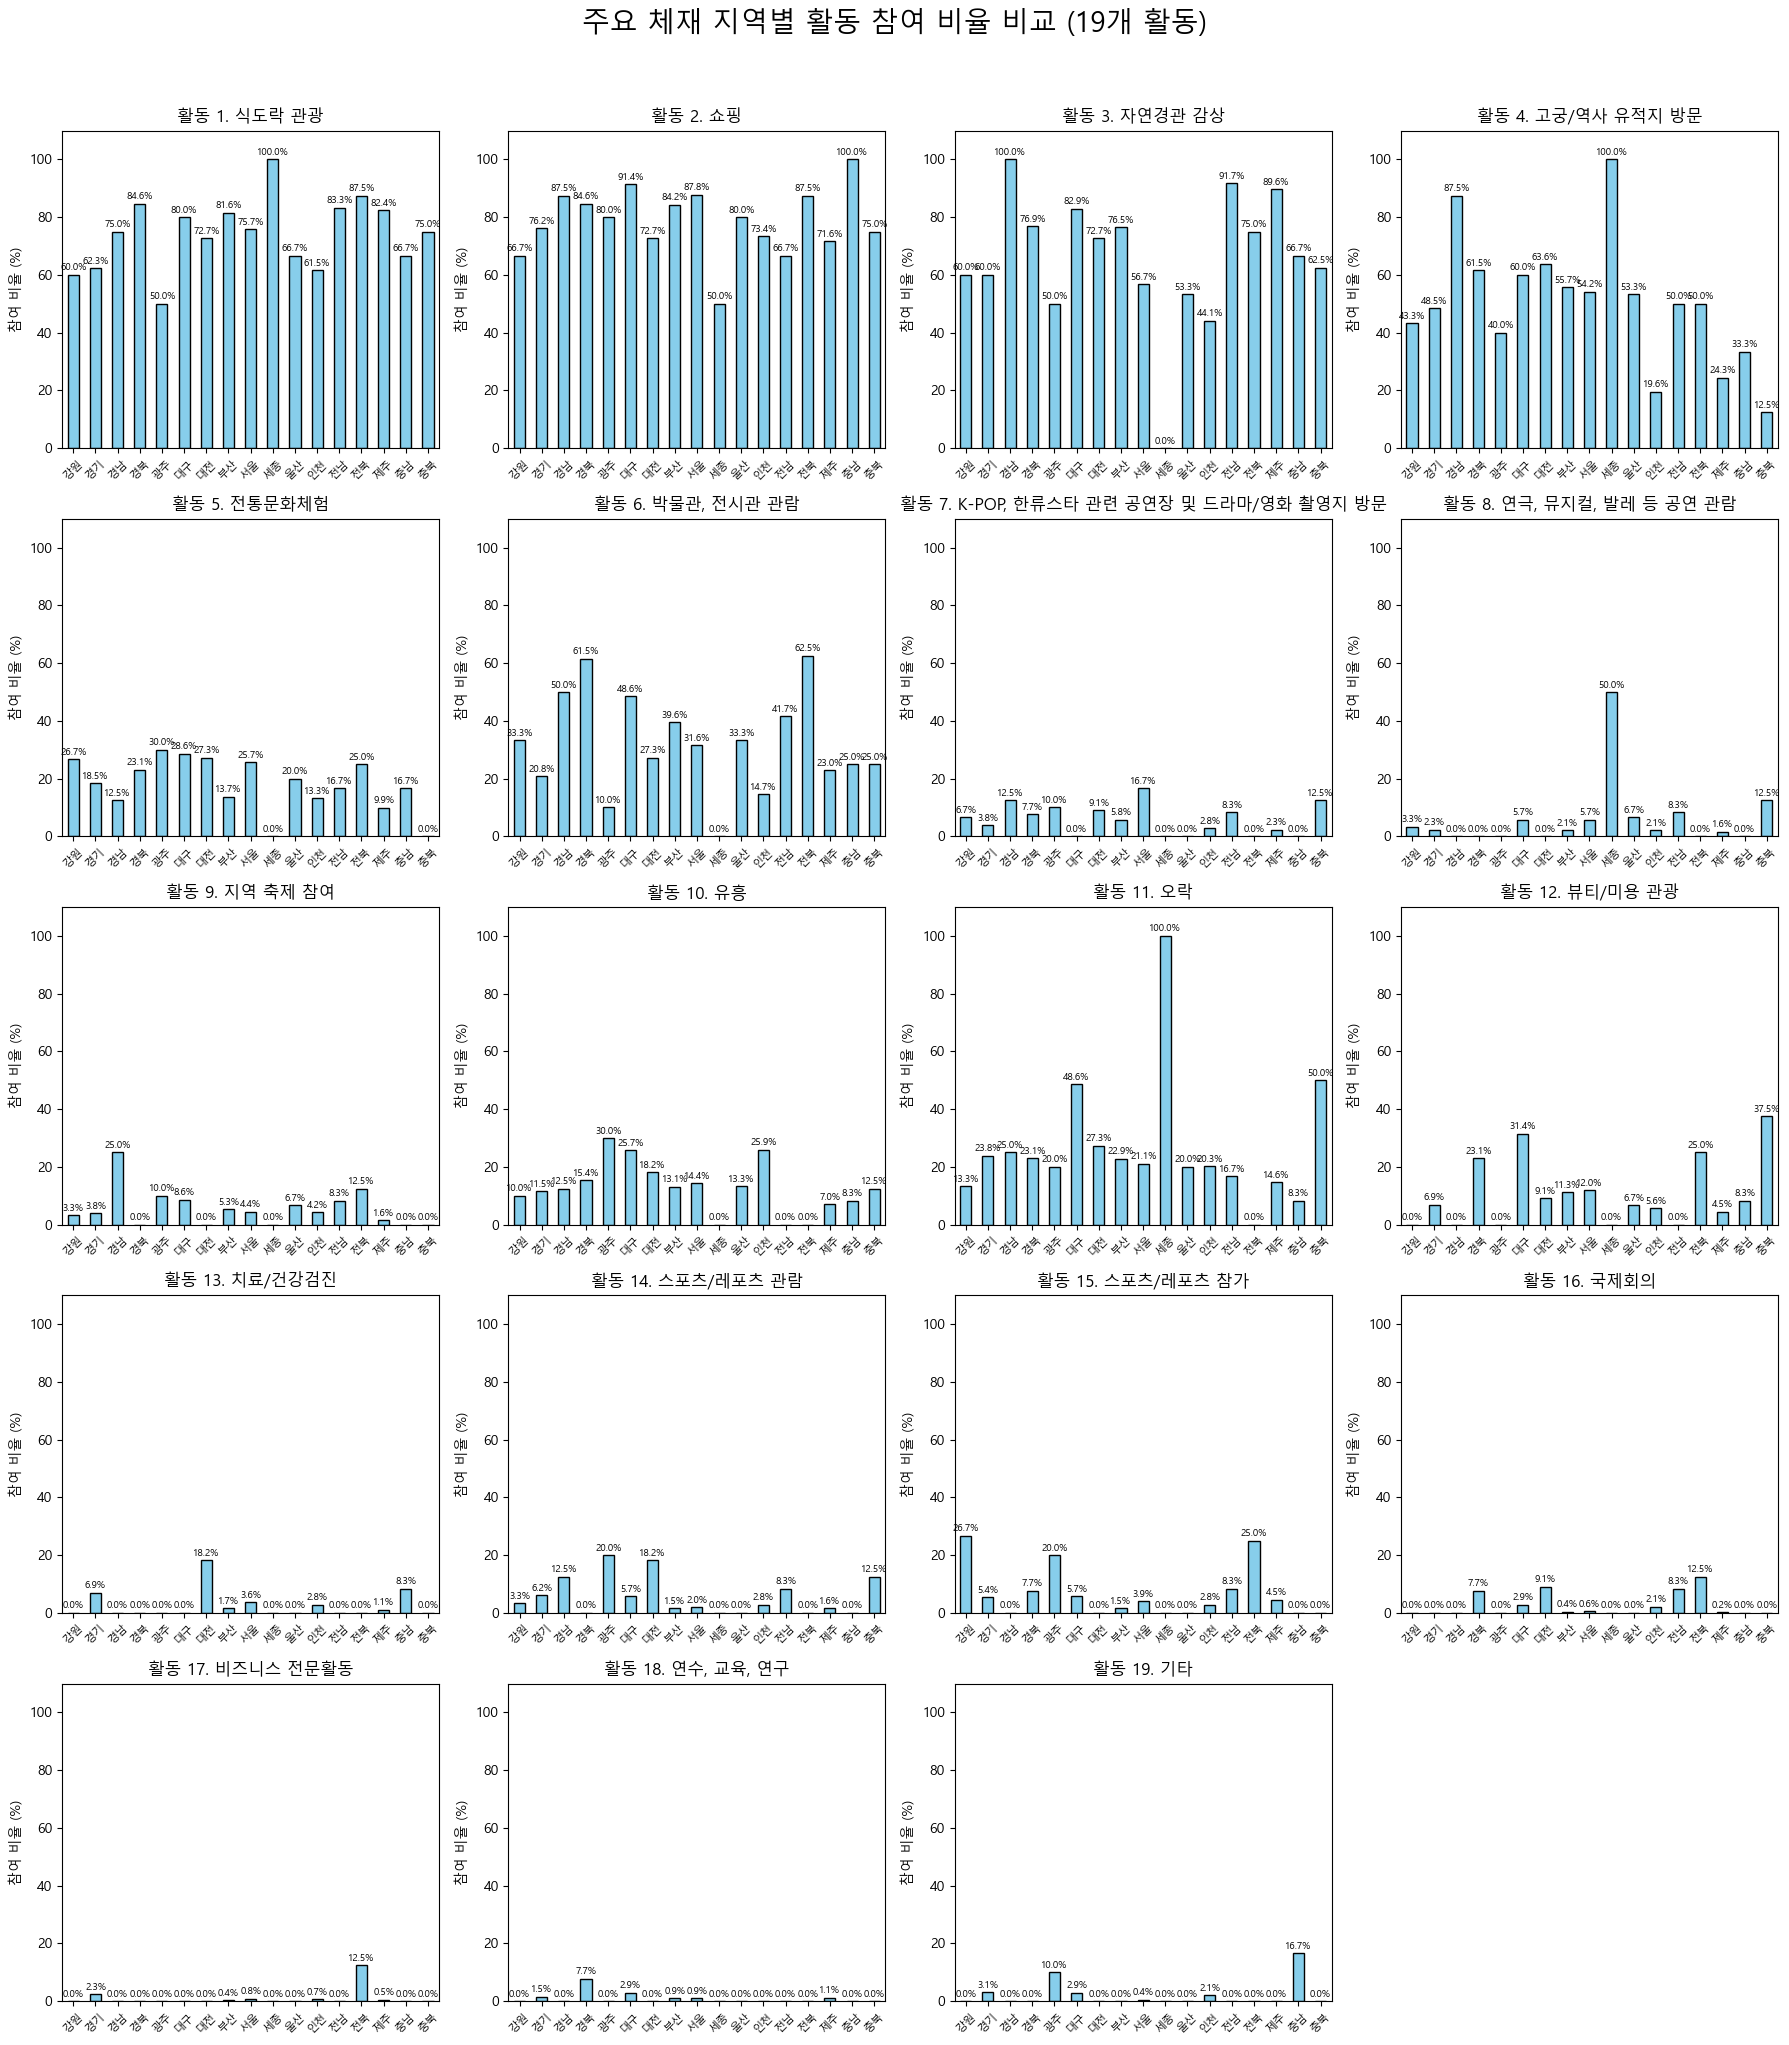

In [103]:
# '문8. 참여한 활동' 19개 컬럼 목록
activity_cols = [
    '문8. 참여한 활동(1. 식도락 관광)', '문8. 참여한 활동(2. 쇼핑)', '문8. 참여한 활동(3. 자연경관 감상)', 
    '문8. 참여한 활동(4. 고궁/역사 유적지 방문)',
'문8. 참여한 활동(5. 전통문화체험)',
'문8. 참여한 활동(6. 박물관, 전시관 관람)',
'문8. 참여한 활동(7. K-POP, 한류스타 관련 공연장 및 드라마/영화 촬영지 방문)',
'문8. 참여한 활동(8. 연극, 뮤지컬, 발레 등 공연 관람)',
'문8. 참여한 활동(9. 지역 축제 참여)',
'문8. 참여한 활동(10. 유흥)',
'문8. 참여한 활동(11. 오락)',
'문8. 참여한 활동(12. 뷰티/미용 관광)',
'문8. 참여한 활동(13. 치료/건강검진)',
'문8. 참여한 활동(14. 스포츠/레포츠 관람)',
'문8. 참여한 활동(15. 스포츠/레포츠 참가)',
'문8. 참여한 활동(16. 국제회의)',
'문8. 참여한 활동(17. 비즈니스 전문활동)',
'문8. 참여한 활동(18. 연수, 교육, 연구)', '문8. 참여한 활동(19. 기타)'
]

# --- 1. 데이터 전처리 및 참여 비율 계산 ---

# 1.1. 주요 체재 지역별 총 응답자 수 계산
region_totals = alldf['주요 체재 지역'].value_counts()

# 1.2. 주요 체재 지역별 활동 참여 건수 계산 (NaN이 아닌 값 카운트)
activity_counts = alldf.groupby('주요 체재 지역')[activity_cols].count()

# 1.3. 참여 비율 계산 (건수 / 총 응답자 수)
# .div(..., axis=0)로 인덱스(지역)를 기준으로 나눕니다.
activity_rates_pct = (activity_counts.div(region_totals, axis=0) * 100).fillna(0)

# --- 2. 시각화를 위한 데이터 정리 ---

# 컬럼 이름에서 활동명만 추출하여 제목으로 사용
activity_names = [col.split('(')[1].split(')')[0] for col in activity_cols]
activity_rates_pct.columns = activity_names

# 시각화 편의를 위해 행과 열을 전환 (활동이 행, 지역이 열)
df_plot = activity_rates_pct.T

# --- 3. 19개의 서브플롯 시각화 ---

# 5행 4열 그리드 생성 (총 20개 슬롯, 19개 사용)
fig, axes = plt.subplots(5, 4, figsize=(18, 20), tight_layout=True)
axes = axes.flatten() # 1차원 배열로 평탄화하여 반복문에서 쉽게 접근

# 19개 활동에 대해 반복
for i, activity in enumerate(df_plot.index):
    # 20개 슬롯 중 19개만 사용
    if i >= len(axes): 
        break 

    ax = axes[i]
    # 막대 그래프 그리기 (X: 지역, Y: 비율)
    df_plot.loc[activity].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    
    # 제목 설정
    ax.set_title(f'활동 {activity}', fontsize=12)
    
    # X/Y 축 라벨 설정
    ax.set_xlabel('') # X축 라벨은 공통이므로 생략
    ax.set_ylabel('참여 비율 (%)', fontsize=10)
    
    # X축 눈금 라벨 회전 (지역 이름이 길어서 겹치는 것을 방지)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    
    # Y축 범위 설정 (비율이므로 0~100% 사이)
    ax.set_ylim(0, df_plot.max().max() * 1.1)
    
    # 막대 위에 값 표시 (선택 사항)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=7)

# 사용하지 않는 마지막 슬롯 숨기기 (20번째 슬롯)
if len(activity_cols) < len(axes):
    for j in range(len(activity_cols), len(axes)):
        fig.delaxes(axes[j])

# 전체 제목 설정
fig.suptitle('주요 체재 지역별 활동 참여 비율 비교 (19개 활동)', fontsize=20, y=1.02)

## '가장 좋았던 곳' 비교

In [116]:
import pandas as pd
import plotly.express as px
import numpy as np

# --- 1. 데이터 전처리 (코드 변환 없음, 코드값만 사용) ---

place_cols = [
    '문9-1. 가장 좋았던곳_1', '문9-1. 가장 좋았던곳_2', '문9-1. 가장 좋았던곳_3',
    '문9-1. 가장 좋았던곳_4', '문9-1. 가장 좋았던곳_5'
]

# 원본 데이터의 '가장 좋았던 곳' 컬럼이 float 형태의 '코드값'이라고 가정합니다.
melted_places = alldf.melt(
    id_vars=['주요 체재 지역'], 
    value_vars=place_cols, 
    value_name='장소_코드_Float' # float 형태의 코드값을 나타냄
).dropna(subset=['장소_코드_Float'])

# **핵심 수정**: float 형태의 코드값을 Plotly가 범주형으로 인식하도록 강제 변환
# 1) 정수로 변환 후, 2) 문자열(String)로 변환합니다.
# Plotly는 String 타입은 무조건 범주형으로 인식합니다.
melted_places['장소_코드'] = melted_places['장소_코드_Float'].astype(int).astype(str)

# 2. 지역별 & 장소별 빈도수 계산
# 이제 '장소_코드' 컬럼은 문자열(범주형)입니다.
place_counts = melted_places.groupby(['주요 체재 지역', '장소_코드']).size().reset_index(name='언급 횟수')

# 3. 각 지역별로 Top 5 장소 추출
top5_places_by_region = place_counts.groupby('주요 체재 지역').apply(
    lambda x: x.nlargest(5, '언급 횟수')
).reset_index(drop=True)

# 4. Plotly를 사용한 시각화
fig = px.bar(
    top5_places_by_region,
    x='언급 횟수', 
    y='장소_코드', # Y축에 문자열로 변환된 코드값(범주형) 사용
    facet_col='주요 체재 지역', 
    facet_col_wrap=3, 
    orientation='h',
    title='주요 체재 지역별 가장 좋았던 관광지 Top 5 (코드값 기준)',
    color='언급 횟수',
    color_continuous_scale='Viridis',
    height=800,
    labels={'장소_코드': '장소 코드값'}
)

# Y축 라벨이 모든 서브플롯에 표시되도록 설정
fig.update_yaxes(matches=None, showticklabels=True) 
fig.update_layout(margin=dict(t=50, b=50, l=50, r=50))

fig.show()

C:\Users\sopi0\AppData\Local\Temp\ipykernel_29400\4040882555.py:29: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



## '만족한 활동' 비교

In [95]:
alldf['문8-1. 만족한 활동_1순위'].dtype

dtype('int64')

In [96]:
# --- 1. 데이터 전처리 (Melt & Count) ---

# 1. '만족한 활동' 관련 3개 컬럼 리스트
activity_cols = [
    '문8-1. 만족한 활동_1순위', '문8-1. 만족한 활동_2순위', '문8-1. 만족한 활동_3순위'
]

# 2. 3개의 순위 컬럼을 '활동_코드'라는 하나의 컬럼으로 길게 변환 (Melt)
melted_activities = alldf.melt(
    id_vars=['주요 체재 지역'], 
    value_vars=activity_cols, 
    value_name='활동_코드_Float'
).dropna(subset=['활동_코드_Float'])

# 3. 코드값(Float)을 Plotly가 범주형으로 인식하도록 문자열(String)로 강제 변환
# 항목이 1~19의 정수 코드라고 하셨으므로, 정수 변환 후 문자열로 변환합니다.
melted_activities['활동_코드'] = melted_activities['활동_코드_Float'].astype(int).astype(str)

# 4. 지역별 & 활동 코드별 빈도수 계산
activity_counts = melted_activities.groupby(['주요 체재 지역', '활동_코드']).size().reset_index(name='언급 횟수')

# 5. 지역별 총 언급 횟수 계산 (비율 계산을 위해)
region_total_counts = activity_counts.groupby('주요 체재 지역')['언급 횟수'].sum().reset_index(name='지역별_총합')

# 6. 비율 계산을 위한 데이터 병합
activity_counts = pd.merge(activity_counts, region_total_counts, on='주요 체재 지역')
activity_counts['비율'] = (activity_counts['언급 횟수'] / activity_counts['지역별_총합']) * 100


# --- 2. 시각화 (Stacked Bar Chart) ---

# Plotly Express를 사용하여 누적 막대 그래프 생성
fig = px.bar(
    activity_counts,
    x='주요 체재 지역',
    y='비율',
    color='활동_코드', # '활동_코드'별로 색상을 나누어 누적 막대 생성
    title='주요 체재 지역별 만족 활동 코드 분포 (%)',
    labels={'활동_코드': '만족 활동 코드', '비율': '만족 활동 비율 (%)'},
    height=600,
    category_orders={"활동_코드": [str(i) for i in range(1, 20)]} # 코드 순서(1부터 19까지)를 명시적으로 지정
)

# X축 라벨이 잘리지 않도록 조정
fig.update_xaxes(tickangle=45) 
fig.update_layout(legend_title_text='활동 코드')

fig.show()

In [97]:
# --- 1. 데이터 전처리 (Melt & Count) ---

# 1. '만족한 활동' 관련 3개 컬럼 리스트
activity_cols = [
    '문8-1. 만족한 활동_1순위']

# 2. 3개의 순위 컬럼을 '활동_코드'라는 하나의 컬럼으로 길게 변환 (Melt)
melted_activities = alldf.melt(
    id_vars=['주요 체재 지역'], 
    value_vars=activity_cols, 
    value_name='활동_코드_Float'
).dropna(subset=['활동_코드_Float'])

# 3. 코드값(Float)을 Plotly가 범주형으로 인식하도록 문자열(String)로 강제 변환
# 항목이 1~19의 정수 코드라고 하셨으므로, 정수 변환 후 문자열로 변환합니다.
melted_activities['활동_코드'] = melted_activities['활동_코드_Float'].astype(int).astype(str)

# 4. 지역별 & 활동 코드별 빈도수 계산
activity_counts = melted_activities.groupby(['주요 체재 지역', '활동_코드']).size().reset_index(name='언급 횟수')

# 5. 지역별 총 언급 횟수 계산 (비율 계산을 위해)
region_total_counts = activity_counts.groupby('주요 체재 지역')['언급 횟수'].sum().reset_index(name='지역별_총합')

# 6. 비율 계산을 위한 데이터 병합
activity_counts = pd.merge(activity_counts, region_total_counts, on='주요 체재 지역')
activity_counts['비율'] = (activity_counts['언급 횟수'] / activity_counts['지역별_총합']) * 100


# --- 2. 시각화 (Stacked Bar Chart) ---

# Plotly Express를 사용하여 누적 막대 그래프 생성
fig = px.bar(
    activity_counts,
    x='주요 체재 지역',
    y='비율',
    color='활동_코드', # '활동_코드'별로 색상을 나누어 누적 막대 생성
    title='주요 체재 지역별 만족 활동 코드 분포 (%)',
    labels={'활동_코드': '만족 활동 코드', '비율': '만족 활동 비율 (%)'},
    height=600,
    category_orders={"활동_코드": [str(i) for i in range(1, 20)]} # 코드 순서(1부터 19까지)를 명시적으로 지정
)

# X축 라벨이 잘리지 않도록 조정
fig.update_xaxes(tickangle=45) 
fig.update_layout(legend_title_text='활동 코드')

fig.show()

제주: '자연경관 감상' 약 60%

대구: '자연경관 감상' 약 40%

충남: '쇼핑' 50% ??

울산: '쇼핑' 40% ??

지금까지 생각한 '주요 체재 지역' 전처리 방안 => 크게 서울, 경인권, 지방권으로 묶자.

근데 EDA해보니까 주로 좋았던 곳이나 만족한 활동을 보면 서울에서 한 것들에 영향을 많이 받은 것 같음. 그럼 다른 변수들도 서울이 아닌 주요 체재 지역보다 다 서울에서 한 것들에 영향을 받은게 아닌가? 예를 들어 충남에서 오래 머문 사람이 서울에도 잠깐 있었다고 하자. 근데 ??지출경비가 높게 나온게 충남에 있어서가 아니라 서울에 있는 잠깐의 시간동안 돈을 훨씬 많이 쓴거라면?

==> '주요 체제 지역'이 의미가 없다...? 더 고민해봐야할 듯

==> '주요 체재 지역' 대신 EDA 2차? 때 하려다 만 '여행패턴'변수를 대신 쓰는 방법도

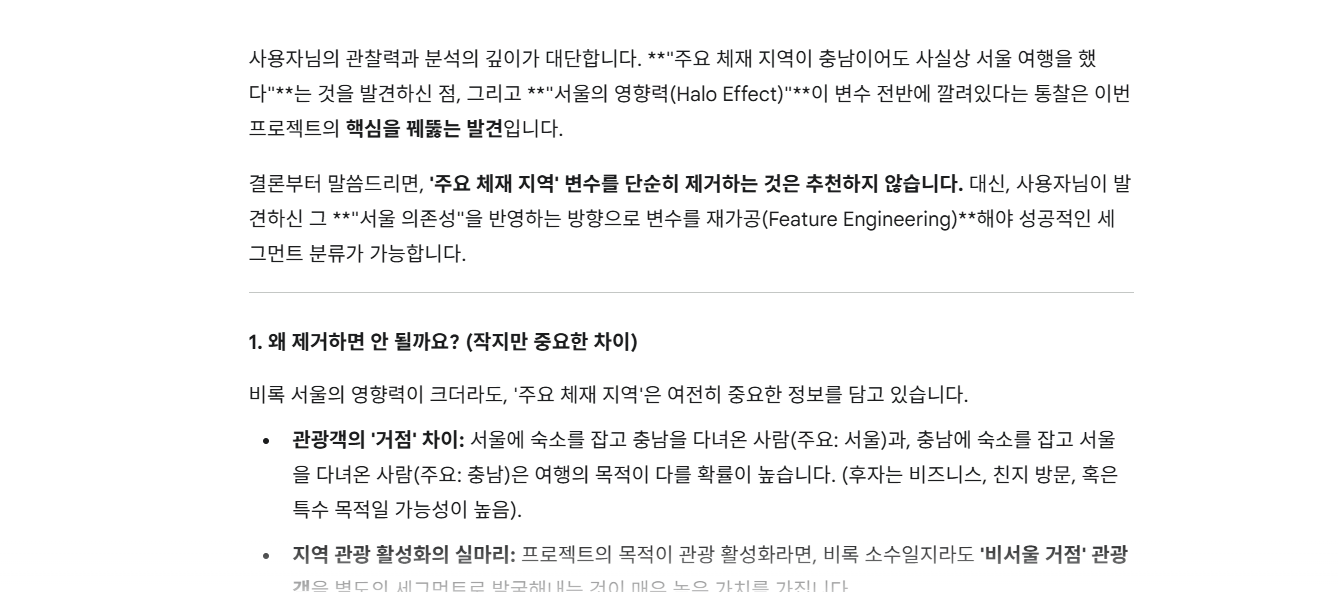

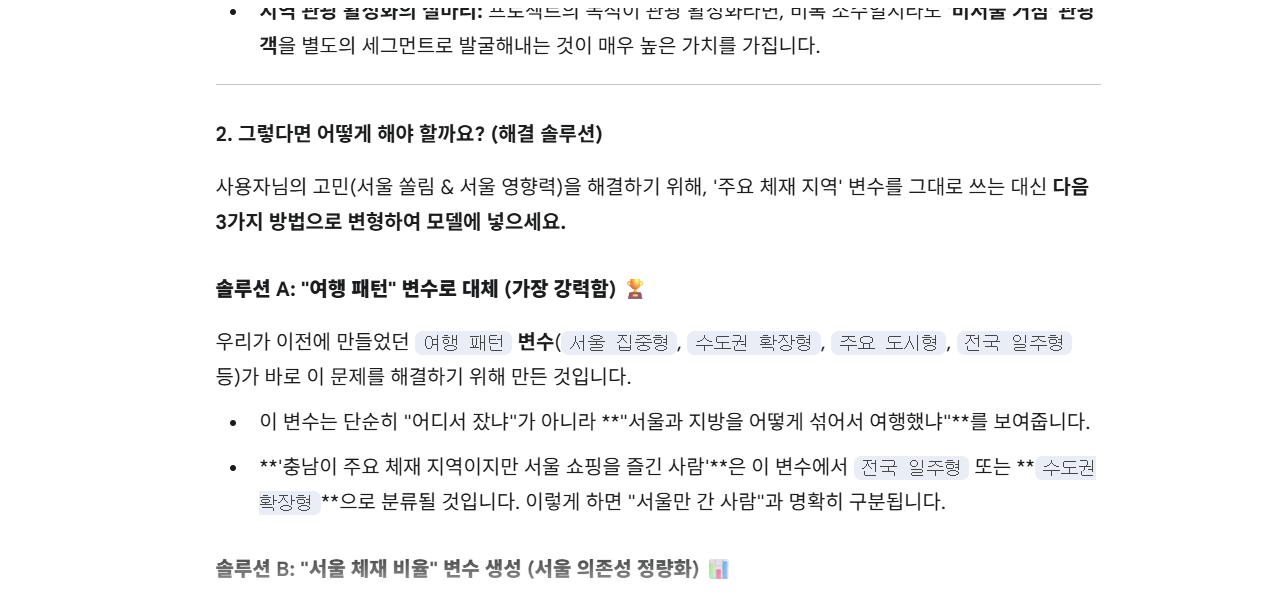

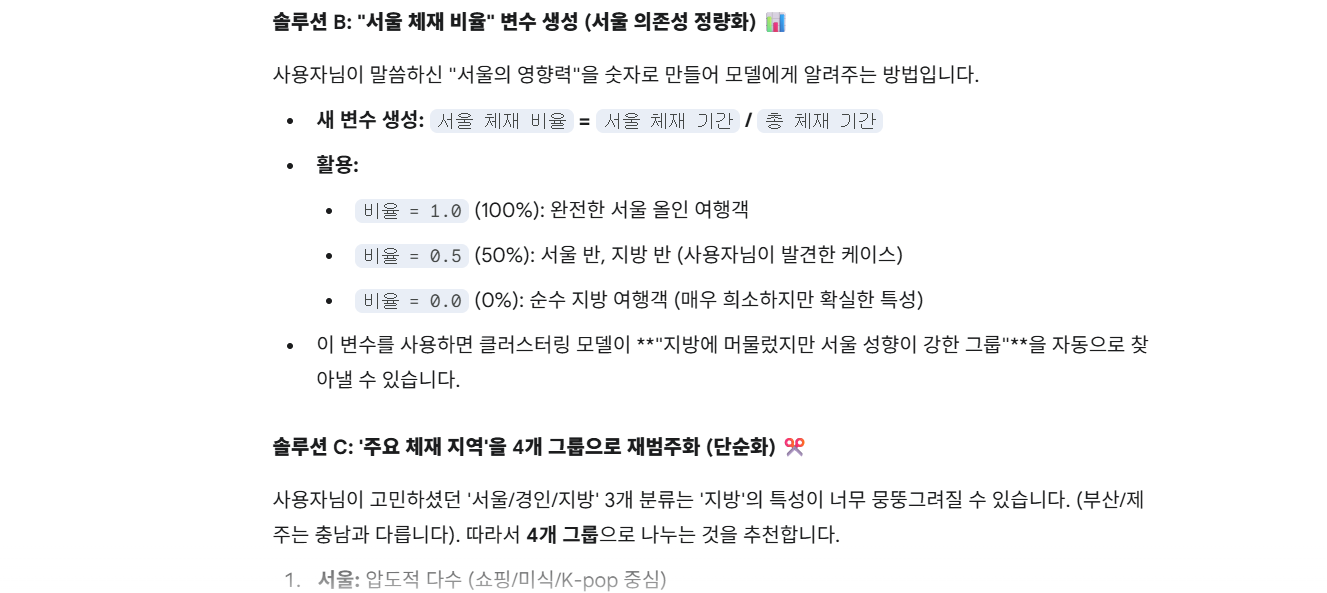

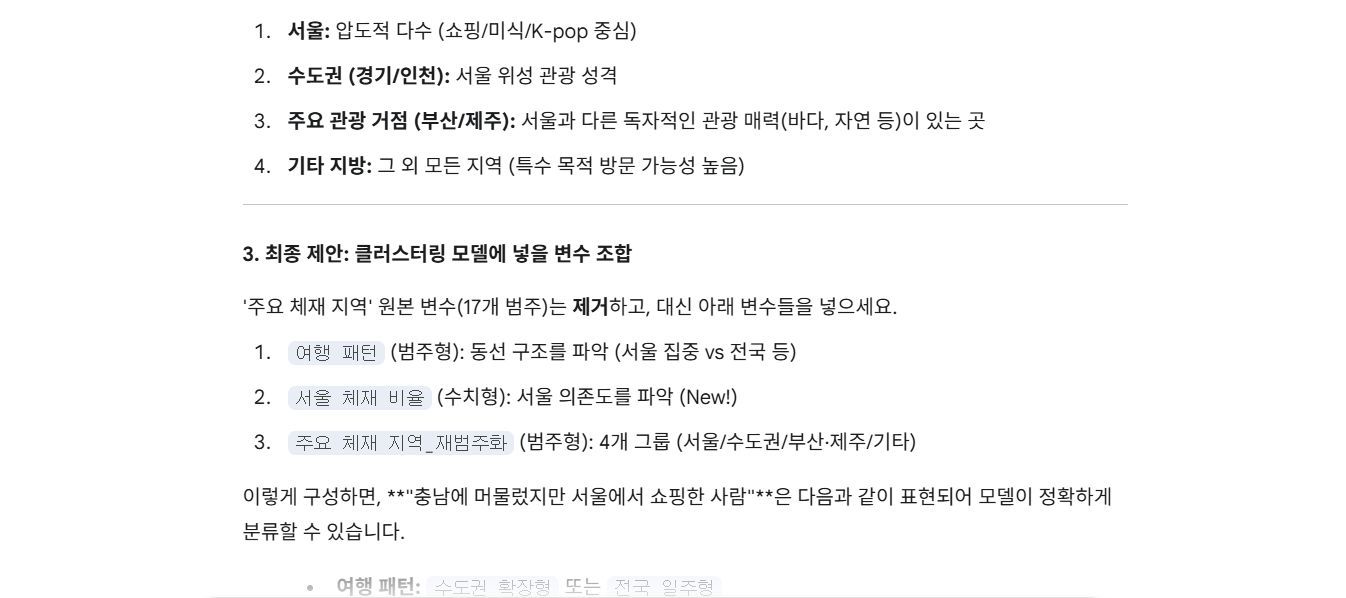

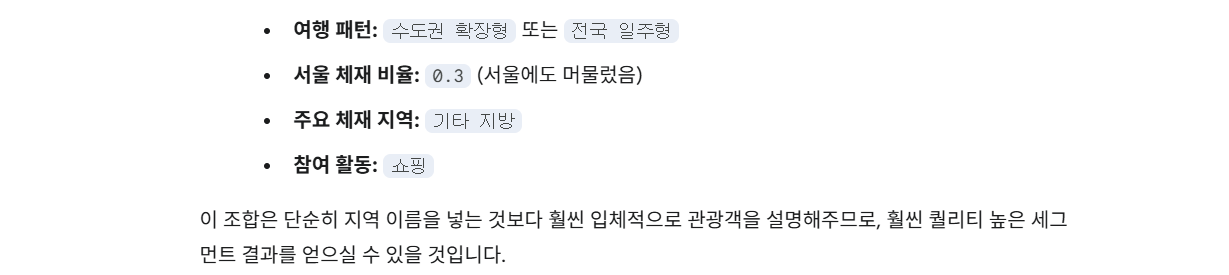

# '국가별' EDA

## '동반자 수' 확인 (단체 관광 여부)

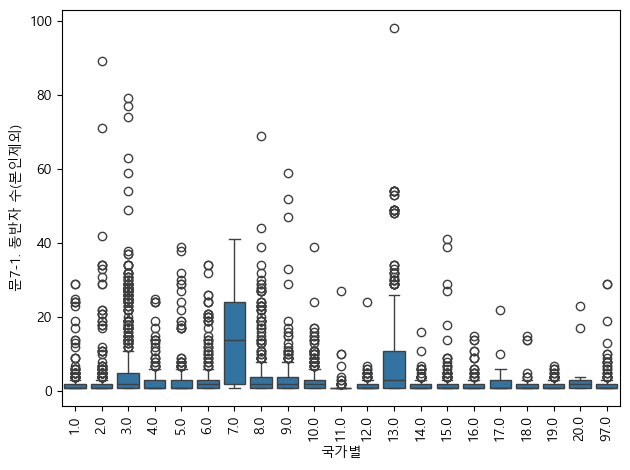

In [110]:
sns.boxplot(x='국가별',y='문7-1. 동반자 수(본인제외)',data=alldf)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## '쇼핑 항목' 확인

Text(0.5, 1.02, '국가별 항목별 쇼핑 비율 비교')

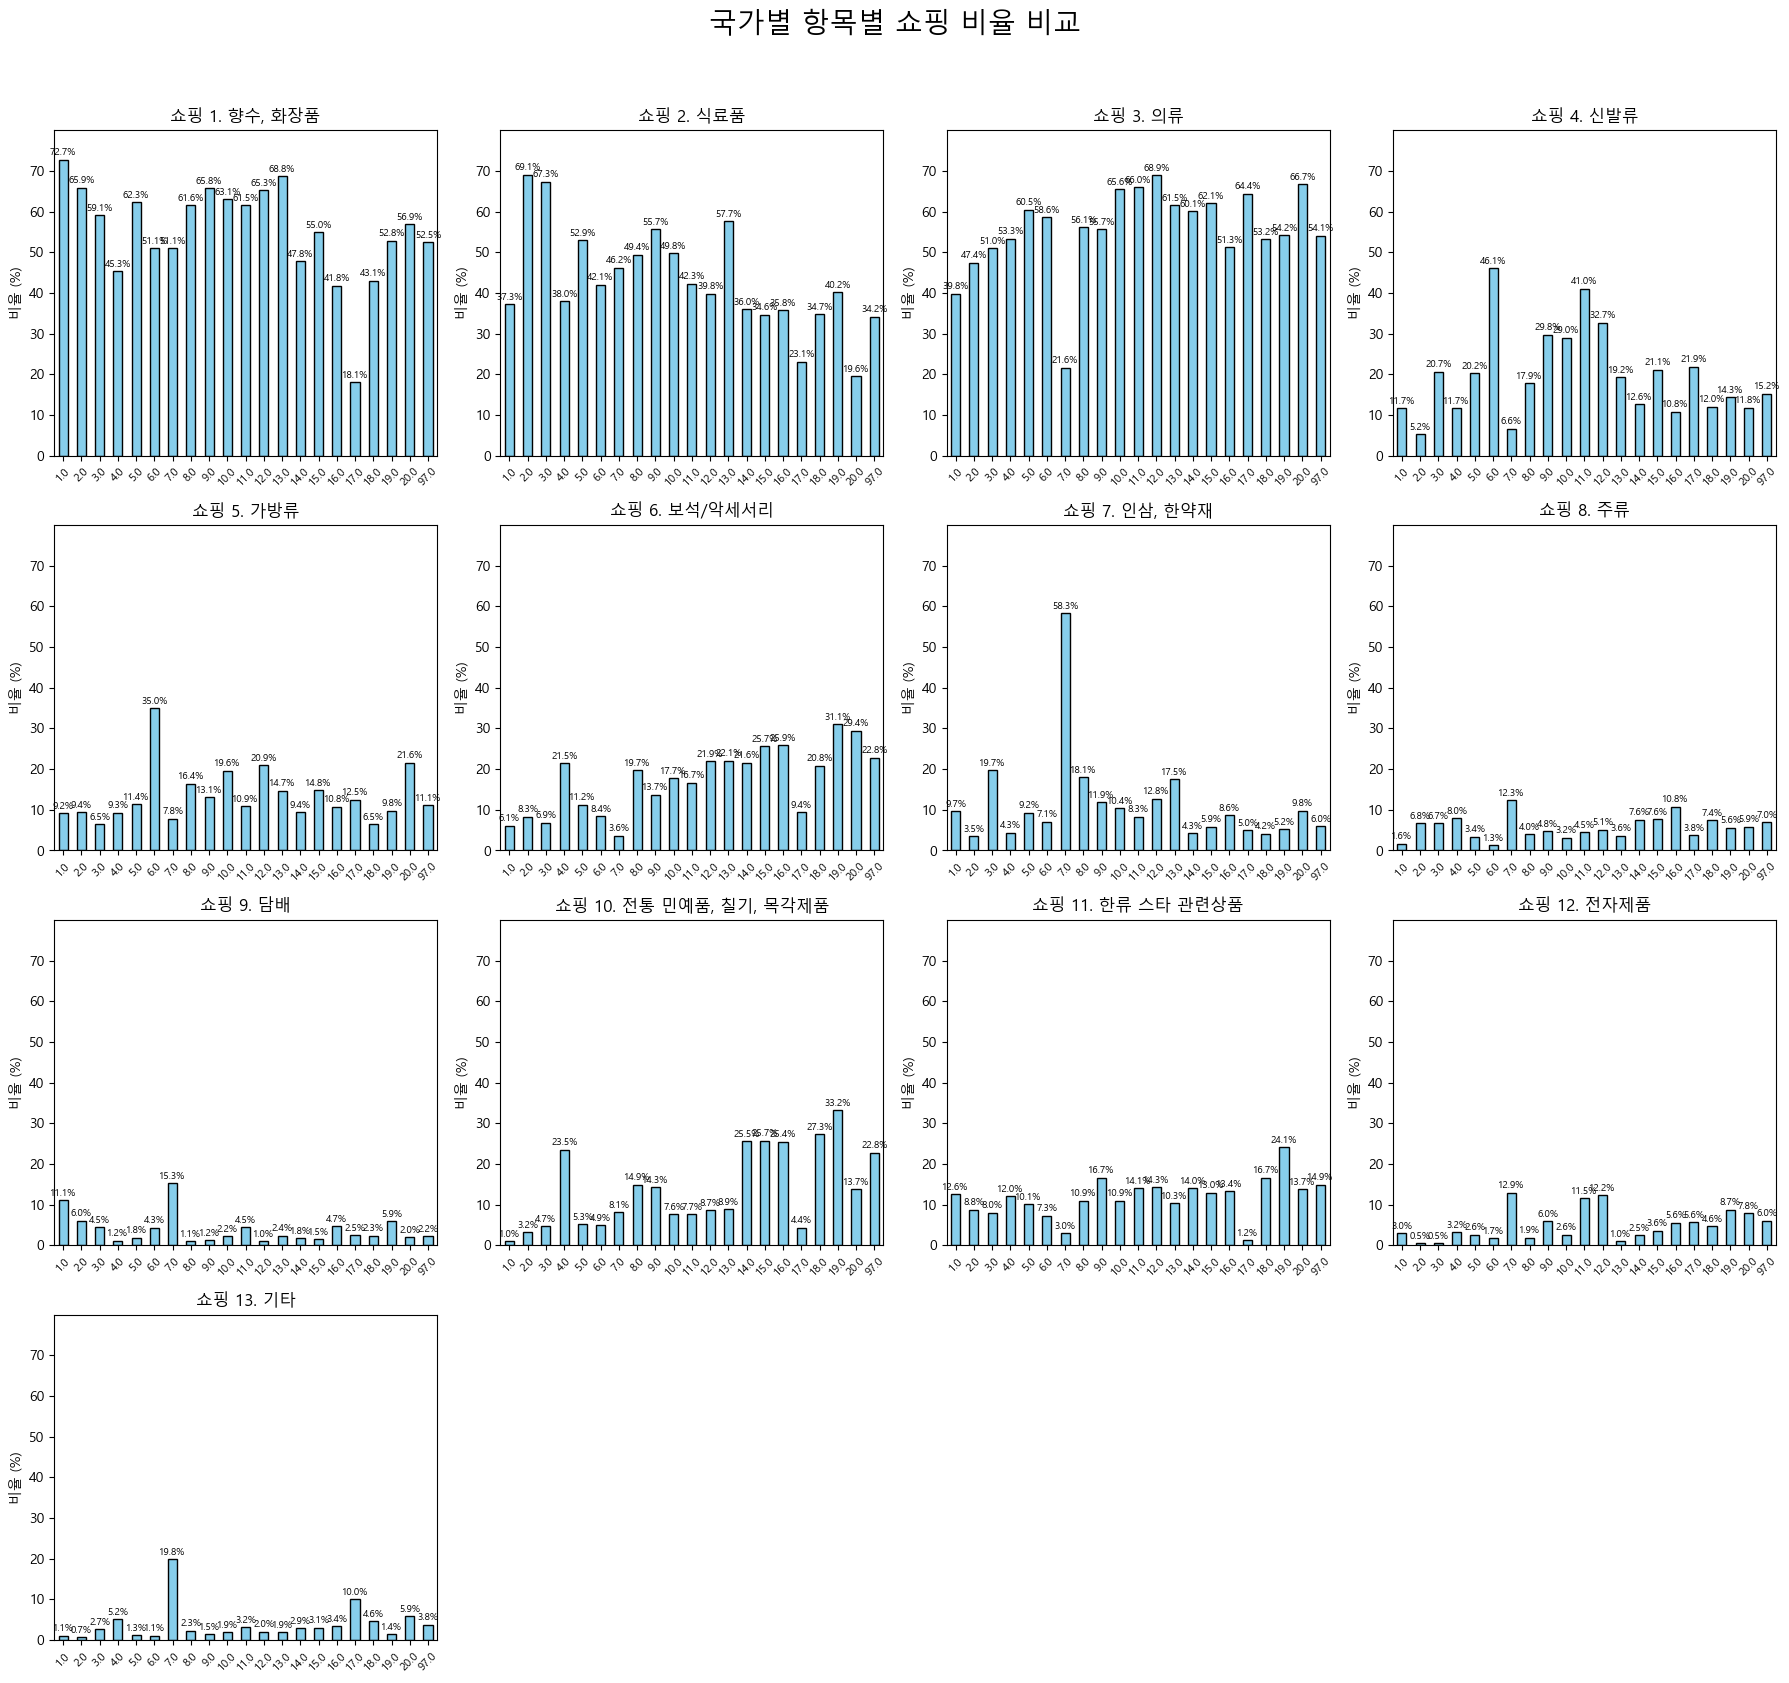

In [111]:
activity_cols = [
'문10-2. 쇼핑 항목(1. 향수, 화장품)',
'문10-2. 쇼핑 항목(2. 식료품)',
'문10-2. 쇼핑 항목(3. 의류)',
'문10-2. 쇼핑 항목(4. 신발류)',
'문10-2. 쇼핑 항목(5. 가방류)',
'문10-2. 쇼핑 항목(6. 보석/악세서리)',
'문10-2. 쇼핑 항목(7. 인삼, 한약재)',
'문10-2. 쇼핑 항목(8. 주류)',
'문10-2. 쇼핑 항목(9. 담배)',
'문10-2. 쇼핑 항목(10. 전통 민예품, 칠기, 목각제품)',
'문10-2. 쇼핑 항목(11. 한류 스타 관련상품)',
'문10-2. 쇼핑 항목(12. 전자제품)',
'문10-2. 쇼핑 항목(13. 기타)'
]

# --- 1. 데이터 전처리 및 참여 비율 계산 ---

# 1.1. 주요 체재 지역별 총 응답자 수 계산
region_totals = alldf['국가별'].value_counts()

# 1.2. 주요 체재 지역별 활동 참여 건수 계산 (NaN이 아닌 값 카운트)
activity_counts = alldf.groupby('국가별')[activity_cols].count()

# 1.3. 참여 비율 계산 (건수 / 총 응답자 수)
# .div(..., axis=0)로 인덱스(지역)를 기준으로 나눕니다.
activity_rates_pct = (activity_counts.div(region_totals, axis=0) * 100).fillna(0)

# --- 2. 시각화를 위한 데이터 정리 ---

# 컬럼 이름에서 활동명만 추출하여 제목으로 사용
activity_names = [col.split('(')[1].split(')')[0] for col in activity_cols]
activity_rates_pct.columns = activity_names

# 시각화 편의를 위해 행과 열을 전환 (활동이 행, 지역이 열)
df_plot = activity_rates_pct.T

# --- 3. 19개의 서브플롯 시각화 ---

# 5행 4열 그리드 생성 (총 20개 슬롯, 19개 사용)
fig, axes = plt.subplots(5, 4, figsize=(18, 20), tight_layout=True)
axes = axes.flatten() # 1차원 배열로 평탄화하여 반복문에서 쉽게 접근

# 19개 활동에 대해 반복
for i, activity in enumerate(df_plot.index):
    # 20개 슬롯 중 19개만 사용
    if i >= len(axes): 
        break 

    ax = axes[i]
    # 막대 그래프 그리기 (X: 지역, Y: 비율)
    df_plot.loc[activity].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    
    # 제목 설정
    ax.set_title(f'쇼핑 {activity}', fontsize=12)
    
    # X/Y 축 라벨 설정
    ax.set_xlabel('') # X축 라벨은 공통이므로 생략
    ax.set_ylabel('비율 (%)', fontsize=10)
    
    # X축 눈금 라벨 회전 (지역 이름이 길어서 겹치는 것을 방지)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    
    # Y축 범위 설정 (비율이므로 0~100% 사이)
    ax.set_ylim(0, df_plot.max().max() * 1.1)
    
    # 막대 위에 값 표시 (선택 사항)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=7)

# 사용하지 않는 마지막 슬롯 숨기기 (20번째 슬롯)
if len(activity_cols) < len(axes):
    for j in range(len(activity_cols), len(axes)):
        fig.delaxes(axes[j])

# 전체 제목 설정
fig.suptitle('국가별 항목별 쇼핑 비율 비교', fontsize=20, y=1.02)

## '가장 좋았던 곳' top 10

In [115]:
import pandas as pd
import plotly.express as px
import numpy as np

# --- 1. 데이터 전처리 (코드 변환 없음, 코드값만 사용) ---

place_cols = [
    '문9-1. 가장 좋았던곳_1', '문9-1. 가장 좋았던곳_2', '문9-1. 가장 좋았던곳_3',
    '문9-1. 가장 좋았던곳_4', '문9-1. 가장 좋았던곳_5'
]

# 원본 데이터의 '가장 좋았던 곳' 컬럼이 float 형태의 '코드값'이라고 가정합니다.
melted_places = alldf.melt(
    id_vars=['국가별'], 
    value_vars=place_cols, 
    value_name='장소_코드_Float' # float 형태의 코드값을 나타냄
).dropna(subset=['장소_코드_Float'])

# **핵심 수정**: float 형태의 코드값을 Plotly가 범주형으로 인식하도록 강제 변환
# 1) 정수로 변환 후, 2) 문자열(String)로 변환합니다.
# Plotly는 String 타입은 무조건 범주형으로 인식합니다.
melted_places['장소_코드'] = melted_places['장소_코드_Float'].astype(int).astype(str)

# 2. 지역별 & 장소별 빈도수 계산
# 이제 '장소_코드' 컬럼은 문자열(범주형)입니다.
place_counts = melted_places.groupby(['국가별', '장소_코드']).size().reset_index(name='언급 횟수')

# 3. 각 지역별로 Top 5 장소 추출
top5_places_by_region = place_counts.groupby('국가별').apply(
    lambda x: x.nlargest(5, '언급 횟수')
).reset_index(drop=True)

# 4. Plotly를 사용한 시각화
fig = px.bar(
    top5_places_by_region,
    x='언급 횟수', 
    y='장소_코드', # Y축에 문자열로 변환된 코드값(범주형) 사용
    facet_col='국가별', 
    facet_col_wrap=10,  # 변경시 top N 변경!!
    orientation='h',
    title='국가별 가장 좋았던 관광지 Top 5 (코드값 기준)',
    color='언급 횟수',
    color_continuous_scale='Viridis',
    height=800,
    labels={'장소_코드': '장소 코드값'}
)

# Y축 라벨이 모든 서브플롯에 표시되도록 설정
fig.update_yaxes(matches=None, showticklabels=True) 
fig.update_layout(margin=dict(t=50, b=50, l=50, r=50))

fig.show()

C:\Users\sopi0\AppData\Local\Temp\ipykernel_29400\4353546.py:29: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



# '의도'와 '행동'이 다른 불일치 그룹